# Explainable Random Forest model evaluation

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import sys
import os

sys.path.append(os.path.abspath("../src"))

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from random_forest import RandomForest
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


wine_df = load_wine()
breast_cancer_df = load_breast_cancer()

### Utility functions

In [17]:
def plot_confusion_matrix(y_true, y_pred, title, labels, filename=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
def print_evaluation(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

## Explainable Random Forest on wine dataset

Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



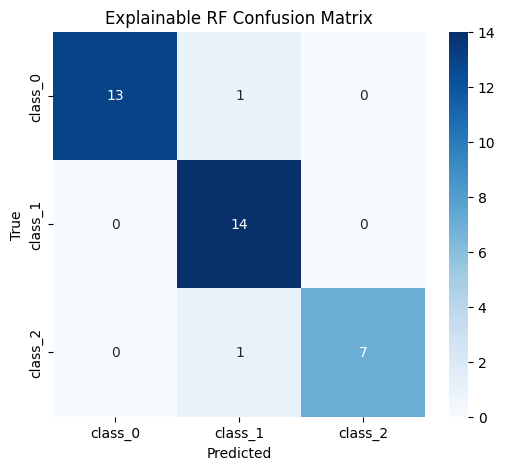

CPU times: user 707 ms, sys: 3.99 ms, total: 711 ms
Wall time: 708 ms


In [ ]:
%%time

X, y = wine_df.data, wine_df.target
feature_names = wine_df.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

forest = RandomForest(n_trees=5, max_depth=3, random_state=2)
forest.fit(X_train, y_train)

y_pred = forest.predict_and_export(X_test, y_test, feature_names=feature_names, filename='../reports/breastcancer_paths_contributions.json')

print_evaluation(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, "Explainable RF Confusion Matrix", wine_df.target_names, "../plots/breastcancer_confusion_explainable.png")

## Sklearn RandomForestClassifier on wine dataset

Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.86      0.89        14
           2       0.88      0.88      0.88         8

    accuracy                           0.92        36
   macro avg       0.91      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



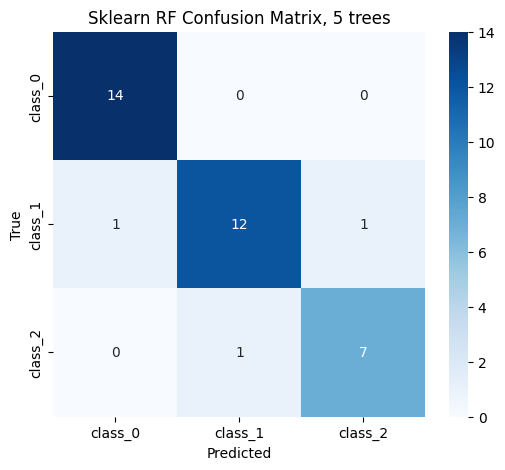

CPU times: user 80.3 ms, sys: 8.04 ms, total: 88.4 ms
Wall time: 87.8 ms


In [19]:
%%time

X, y = wine_df.data, wine_df.target
feature_names = wine_df.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train your forest
forest = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print_evaluation(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, "Sklearn RF Confusion Matrix, 5 trees", wine_df.target_names)

## Sklearn RandomForestClassifier on wine dataset, standard hyperparameters

Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



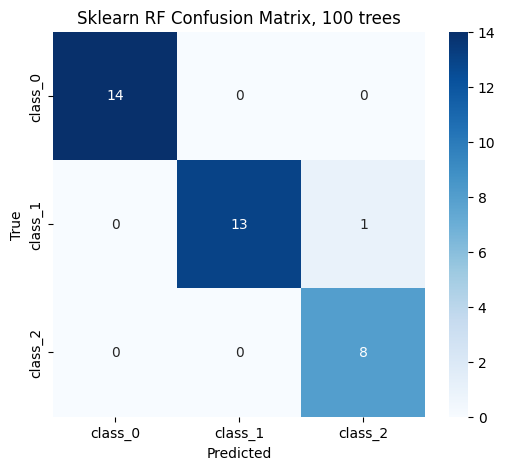

CPU times: user 162 ms, sys: 16 μs, total: 162 ms
Wall time: 162 ms


In [20]:
%%time
X, y = wine_df.data, wine_df.target
feature_names = wine_df.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train your forest
forest = RandomForestClassifier(random_state=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print_evaluation(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, "Sklearn RF Confusion Matrix, 100 trees", wine_df.target_names)

## Explainable RF on breast cancer dataset

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



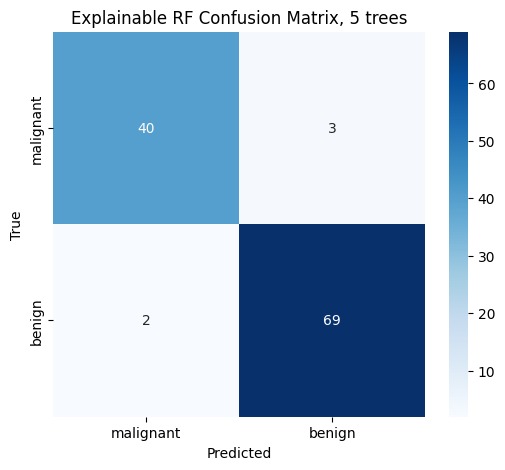

CPU times: user 6.44 s, sys: 3.79 ms, total: 6.44 s
Wall time: 6.44 s


In [21]:
%%time
X, y = breast_cancer_df.data, breast_cancer_df.target
feature_names = breast_cancer_df.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

forest = RandomForest(n_trees=5, max_depth=3, random_state=1)
forest.fit(X_train, y_train)

y_pred = forest.predict_and_export(X_test, y_test, feature_names=feature_names, filename='../reports/breastcancer_paths_contributions.json')

print_evaluation(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, "Explainable RF Confusion Matrix, 5 trees", breast_cancer_df.target_names, "../plots/breastcancer_confusion_explainable.png")

## Scikit-learn RandomForestClassifier on breast cancer dataset

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



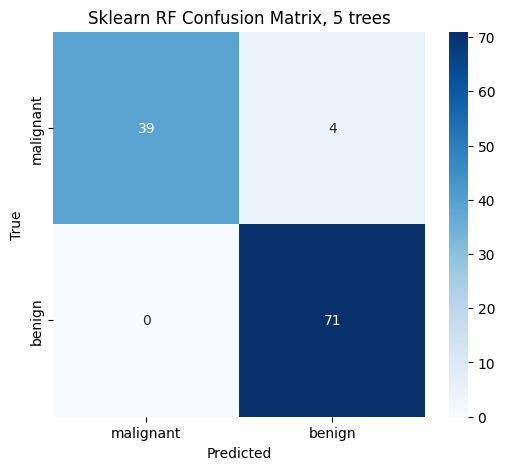

CPU times: user 158 ms, sys: 15 μs, total: 158 ms
Wall time: 158 ms


In [22]:
%%time
X, y = breast_cancer_df.data, breast_cancer_df.target
feature_names = breast_cancer_df.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

forest = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print_evaluation(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, "Sklearn RF Confusion Matrix, 5 trees", breast_cancer_df.target_names, "../plots/breastcancer_confusion_explainable.png")

## Scikit-learn RandomForestClassifier on breast cancer dataset, standard hyperparameters

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



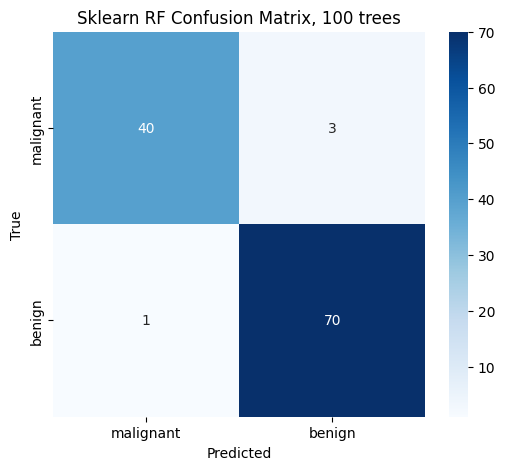

CPU times: user 275 ms, sys: 13 μs, total: 275 ms
Wall time: 274 ms


In [23]:
%%time
X, y = breast_cancer_df.data, breast_cancer_df.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print_evaluation(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, "Sklearn RF Confusion Matrix, 100 trees", breast_cancer_df.target_names, "../plots/breastcancer_confusion_sklearn.png")